<a href="https://colab.research.google.com/github/marianecosta/analise-performance-carteira-ativos/blob/main/Analise_performance_carteira_ativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análise da performance de uma carteira de ativos

- Análise de como os ativos performaram, quanto que rendeu a carteira e comparará-la com o IBOV

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 2.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Valor Investido,Tipo,Qtde
0,BOVA11,5000,ETF,100.000000
1,SMAL11,5000,ETF,100.000000
2,MGLU3,5000,Ação,1000.000000
3,BBDC4,5000,Ação,100.000000
4,ITUB4,5000,Ação,100.000000
5,ENEV3,5000,Ação,300.000000
6,MOVI3,5000,Ação,100.000000
7,BPAC11,10000,Ação,100.000000
8,NTCO3,5000,Ação,100.000000
9,BCRI11,5000,FII,100.000000


Text(0, 0.5, '')

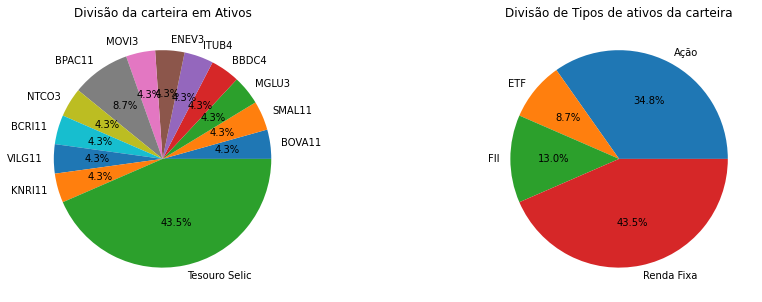

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

grafico1 = carteira.plot.pie(labels=carteira['Ativos'], y='Valor Investido', title="Divisão da carteira em Ativos", autopct="%.1f%%", ax=ax1, legend=False)
grafico1.set_ylabel('')

grafico2 = carteira.groupby('Tipo').sum().plot.pie(ax=ax2, y='Valor Investido',  title="Divisão de Tipos de ativos da carteira", autopct="%.1f%%", legend=False)
grafico2.set_ylabel('')

### Criando o dataframe de cotações dos ativos da carteira

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,119024.0,120354.0,118062.0,118558.0,118558.0,8741400
2021-01-05,118835.0,119790.0,116756.0,119223.0,119223.0,9257100
2021-01-06,119377.0,120924.0,118917.0,119851.0,119851.0,11638200
2021-01-07,119103.0,121983.0,119101.0,121956.0,121956.0,11774800
2021-01-08,122387.0,125324.0,122386.0,125077.0,125077.0,11085800
...,...,...,...,...,...,...
2021-11-03,105547.0,106754.0,104205.0,105617.0,105617.0,14696900
2021-11-04,105617.0,105627.0,102835.0,103412.0,103412.0,12084000
2021-11-05,103412.0,105555.0,103412.0,104824.0,104824.0,12595000


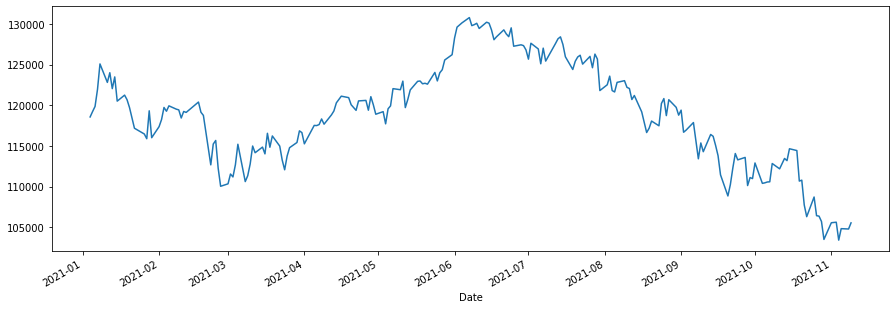

In [ ]:
ibov_df = yf.download('^BVSP', data_source='yahoo', start='2021-01-01', end='2021-11-10')
display(ibov_df)
ibov_df['Adj Close'].plot(figsize=(15, 5))

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,IBOV
Date,,,,,,,
2021-01-04,119024.0,120354.0,118062.0,118558.0,118558.0,8741400,118558.0
2021-01-05,118835.0,119790.0,116756.0,119223.0,119223.0,9257100,119223.0
2021-01-06,119377.0,120924.0,118917.0,119851.0,119851.0,11638200,119851.0
2021-01-07,119103.0,121983.0,119101.0,121956.0,121956.0,11774800,121956.0
2021-01-08,122387.0,125324.0,122386.0,125077.0,125077.0,11085800,125077.0
...,...,...,...,...,...,...,...
2021-11-03,105547.0,106754.0,104205.0,105617.0,105617.0,14696900,105617.0
2021-11-04,105617.0,105627.0,102835.0,103412.0,103412.0,12084000,103412.0
2021-11-05,103412.0,105555.0,103412.0,104824.0,104824.0,12595000,104824.0


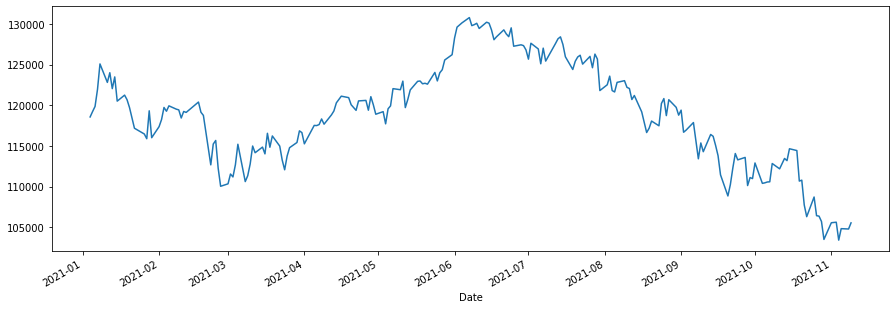

In [ ]:
ibov_df['IBOV'] = yf.download('^BVSP', data_source='yahoo', start='2021-01-01', end='2021-11-10')['Adj Close']
display(ibov_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11
Date,,,,,,,,,,,,
2021-01-04,114.089996,134.000000,25.181740,20.471836,29.288074,15.6325,18.638910,22.434692,51.669197,109.035873,122.508278,155.683975
2021-01-05,114.690002,133.699997,24.742058,20.347019,29.098511,15.7425,18.519428,22.265972,51.371044,109.244865,123.353302,154.840973
2021-01-06,115.550003,131.059998,23.442999,21.021381,29.951561,14.9350,18.008179,21.547718,48.797028,109.814835,122.615120,154.899094
2021-01-07,118.370003,130.949997,23.143217,21.579466,31.117397,14.9250,17.869295,21.684273,48.180855,110.479813,122.479141,154.986328
2021-01-08,120.400002,132.529999,23.822723,21.393438,31.107918,15.6200,18.609991,22.371161,50.407032,111.325264,122.284889,154.598740
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03,102.000000,118.099998,11.550000,17.935669,23.685528,14.8200,14.446375,23.258978,40.269970,101.996712,95.972755,129.357147
2021-11-04,99.650002,115.800003,11.080000,16.748751,22.435862,14.8800,14.211855,22.839104,38.809040,101.692719,94.399277,129.454041
2021-11-05,100.809998,118.500000,12.440000,17.575201,22.164616,15.3900,14.680894,23.864374,39.246326,101.474220,94.311852,129.027679


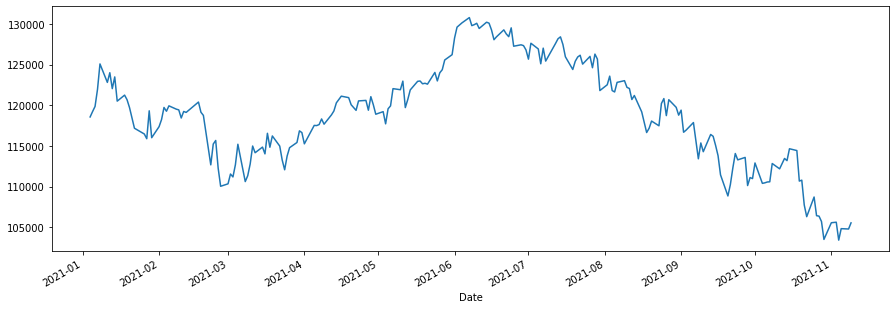

In [ ]:
carteira_df = pd.DataFrame()

for ativo in carteira['Ativos']:
    if 'Tesouro' not in ativo:
      carteira_df[ativo] = yf.download(f'{ativo}.SA', data_source='yahoo', start='2021-01-01', end='2021-11-10')['Adj Close']
carteira_df = carteira_df.ffill()
display(carteira_df)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
2,Tesouro Selic,01/03/2027,2022-04-18,0.19,0.20,11460.45,11449.76,11449.76
13,Tesouro Selic,01/03/2023,2022-05-05,0.06,0.07,11621.12,11614.61,11614.61
14,Tesouro Selic,01/09/2024,2022-05-05,0.14,0.15,11590.64,11582.37,11582.37
23,Tesouro Selic,01/03/2025,2022-05-05,0.14,0.15,11581.68,11572.83,11572.83
31,Tesouro Selic,01/03/2027,2022-05-05,0.19,0.20,11521.80,11510.70,11510.70
...,...,...,...,...,...,...,...,...
124534,Tesouro Selic,01/03/2023,2021-02-23,0.13,0.14,10761.32,10759.17,10758.26
124535,Tesouro Selic,01/09/2024,2021-02-23,0.16,0.17,10727.32,10723.55,10722.63
124543,Tesouro Selic,01/03/2025,2021-02-23,0.16,0.17,10718.68,10714.38,10713.46
124550,Tesouro Selic,01/03/2027,2021-02-23,0.33,0.34,10575.70,10569.38,10568.41


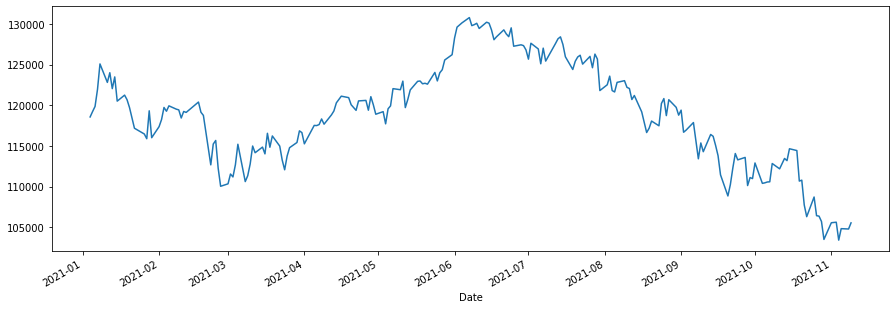

In [ ]:
tesouro_df = pd.read_csv('https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv', sep=';', decimal=',')
tesouro_df['Data Base'] = pd.to_datetime(tesouro_df['Data Base'], format='%d/%m/%Y')
tesouro_df = tesouro_df.loc[tesouro_df['Tipo Titulo']=='Tesouro Selic', :]
display(tesouro_df)

Juntando tesouro selic com a carteira

,Date,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,PU Base Manha
0,2021-01-04,114.089996,134.000000,25.181740,20.471836,29.288074,15.6325,18.638910,22.434692,51.669197,109.035873,122.508278,155.683975,10691.65
1,2021-01-04,114.089996,134.000000,25.181740,20.471836,29.288074,15.6325,18.638910,22.434692,51.669197,109.035873,122.508278,155.683975,10759.14
2,2021-01-04,114.089996,134.000000,25.181740,20.471836,29.288074,15.6325,18.638910,22.434692,51.669197,109.035873,122.508278,155.683975,10733.47
3,2021-01-05,114.690002,133.699997,24.742058,20.347019,29.098511,15.7425,18.519428,22.265972,51.371044,109.244865,123.353302,154.840973,10693.76
4,2021-01-05,114.690002,133.699997,24.742058,20.347019,29.098511,15.7425,18.519428,22.265972,51.371044,109.244865,123.353302,154.840973,10760.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2021-11-08,100.830002,117.349998,11.930000,17.170767,22.048368,15.2100,14.418232,23.258978,38.719597,101.493225,93.243446,129.337723,10939.72
833,2021-11-09,101.389999,119.250000,13.130000,16.977343,21.825558,15.5300,14.821606,22.155592,40.488617,101.170250,91.660240,131.004364,10943.10
834,2021-11-09,101.389999,119.250000,13.130000,16.977343,21.825558,15.5300,14.821606,22.155592,40.488617,101.170250,91.660240,131.004364,11097.43
835,2021-11-09,101.389999,119.250000,13.130000,16.977343,21.825558,15.5300,14.821606,22.155592,40.488617,101.170250,91.660240,131.004364,11062.77


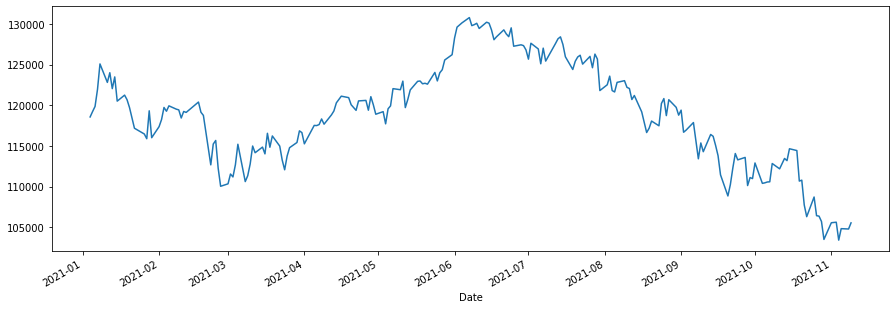

In [ ]:
tesouro_df = tesouro_df.rename(columns={'Data Base': 'Date'})
carteira_df = carteira_df.merge(tesouro_df[['Date', 'PU Base Manha']], on='Date', how='left')
display(carteira_df)

,Date,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,Tesouro Selic
0,2021-01-04,114.089996,134.000000,25.181740,20.471836,29.288074,15.6325,18.638910,22.434692,51.669197,109.035873,122.508278,155.683975,10691.65
1,2021-01-04,114.089996,134.000000,25.181740,20.471836,29.288074,15.6325,18.638910,22.434692,51.669197,109.035873,122.508278,155.683975,10759.14
2,2021-01-04,114.089996,134.000000,25.181740,20.471836,29.288074,15.6325,18.638910,22.434692,51.669197,109.035873,122.508278,155.683975,10733.47
3,2021-01-05,114.690002,133.699997,24.742058,20.347019,29.098511,15.7425,18.519428,22.265972,51.371044,109.244865,123.353302,154.840973,10693.76
4,2021-01-05,114.690002,133.699997,24.742058,20.347019,29.098511,15.7425,18.519428,22.265972,51.371044,109.244865,123.353302,154.840973,10760.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2021-11-08,100.830002,117.349998,11.930000,17.170767,22.048368,15.2100,14.418232,23.258978,38.719597,101.493225,93.243446,129.337723,10939.72
833,2021-11-09,101.389999,119.250000,13.130000,16.977343,21.825558,15.5300,14.821606,22.155592,40.488617,101.170250,91.660240,131.004364,10943.10
834,2021-11-09,101.389999,119.250000,13.130000,16.977343,21.825558,15.5300,14.821606,22.155592,40.488617,101.170250,91.660240,131.004364,11097.43
835,2021-11-09,101.389999,119.250000,13.130000,16.977343,21.825558,15.5300,14.821606,22.155592,40.488617,101.170250,91.660240,131.004364,11062.77


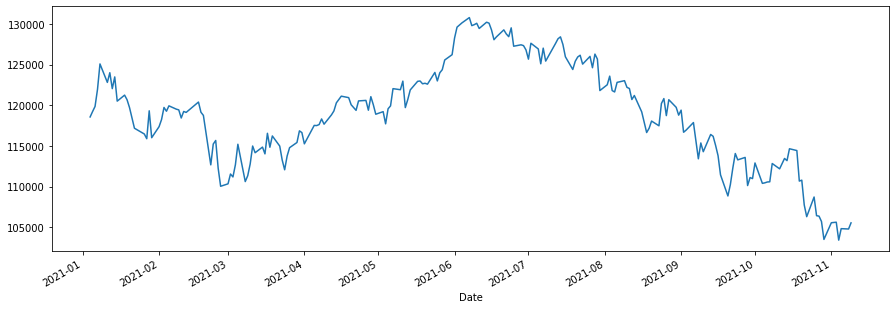

In [ ]:
carteira_df = carteira_df.rename(columns={'PU Base Manha': 'Tesouro Selic'})
carteira_df = carteira_df.ffill()
display(carteira_df)

Cálculo do valor investido

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,Tesouro Selic,Total
Date,,,,,,,,,,,,,,
2021-01-04,11408.999634,13400.000000,25181.739807,2047.183609,2928.807449,4689.749908,1863.891029,2243.469238,5166.919708,10903.587341,12250.827789,15568.397522,51055.184589,158708.757625
2021-01-04,11408.999634,13400.000000,25181.739807,2047.183609,2928.807449,4689.749908,1863.891029,2243.469238,5166.919708,10903.587341,12250.827789,15568.397522,51377.465472,159031.038509
2021-01-04,11408.999634,13400.000000,25181.739807,2047.183609,2928.807449,4689.749908,1863.891029,2243.469238,5166.919708,10903.587341,12250.827789,15568.397522,51254.885086,158908.458122
2021-01-05,11469.000244,13369.999695,24742.057800,2034.701920,2909.851074,4722.750092,1851.942825,2226.597214,5137.104416,10924.486542,12335.330200,15484.097290,51065.260343,158273.179655
2021-01-05,11469.000244,13369.999695,24742.057800,2034.701920,2909.851074,4722.750092,1851.942825,2226.597214,5137.104416,10924.486542,12335.330200,15484.097290,51382.192959,158590.112271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,10083.000183,11734.999847,11930.000305,1717.076683,2204.836845,4563.000011,1441.823196,2325.897789,3871.959686,10149.322510,9324.344635,12933.772278,52239.778140,134519.812110
2021-11-09,10138.999939,11925.000000,13130.000114,1697.734261,2182.555771,4658.999920,1482.160568,2215.559196,4048.861694,10117.024994,9166.024017,13100.436401,52255.918448,136119.275324
2021-11-09,10138.999939,11925.000000,13130.000114,1697.734261,2182.555771,4658.999920,1482.160568,2215.559196,4048.861694,10117.024994,9166.024017,13100.436401,52992.881091,136856.237967


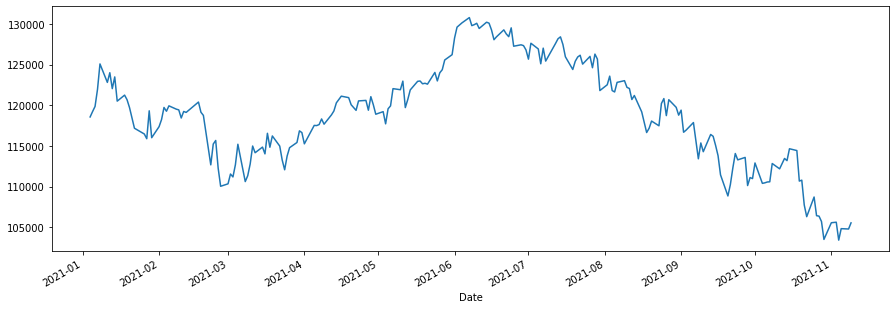

In [ ]:
valor_investido= carteira_df.copy()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = valor_investido[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]  
valor_investido= valor_investido.set_index('Date')
valor_investido['Total'] = valor_investido.sum(axis=1) 
display(valor_investido)

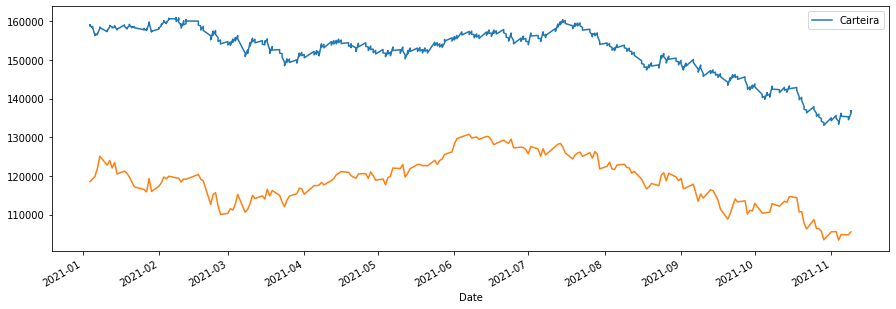

In [ ]:
valor_investido_norm = valor_investido / valor_investido.iloc[0]
ibov_df_norm = ibov_df / ibov_df.iloc[0]

valor_investido['Total'].plot(figsize=(20,8), label= 'Carteira')
plt.legend()

In [ ]:
rentabilidade_carteira = valor_investido_norm['Total'].iloc[-1] - 1
rentabilidade_ibov = ibov_df_norm['Adj Close'].iloc[-1] - 1
print('Rentabilidade da Carteira {:.1%}'.format(rentabilidade_carteira))
print('Rentabilidade do Ibovespa {:.1%}'.format(rentabilidade_ibov))

Rentabilidade da Carteira -13.9%
Rentabilidade do Ibovespa -11.0%


### Correlação da Carteira com o IBOV

In [ ]:
correlacao = valor_investido['Total'].corr(ibov_df['Adj Close'])
print(correlacao)

0.7442866820444756
